In [1]:
pip install pandas

In [2]:
pip install plotly

In [3]:
pip install matplotlib

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Marmara2024_PrX.csv",sep=",")

In [6]:
 Marmara2024_PrX = df
 Marmara2024_PrX.head()

,Time,Longitude,Latitude,Depth,Magnitude
0,12/29/2024 04:24:10,26.96,40.31,10.81,2.0
1,12/29/2024 03:48:10,27.02,40.29,9.05,2.2
2,12/25/2024 06:06:10,27.79,40.80,6.94,2.4
3,12/24/2024 05:25:10,25.56,41.04,12.31,2.0
4,12/22/2024 12:08:10,27.95,40.82,7.00,3.5


In [7]:
Marmara2024_PrX.shape

(435, 5)

In [8]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = Marmara2024_PrX.iloc[:,3].values
colors = Marmara2024_PrX.iloc[:,4].values
sizes = Marmara2024_PrX.iloc[:,4].values*40

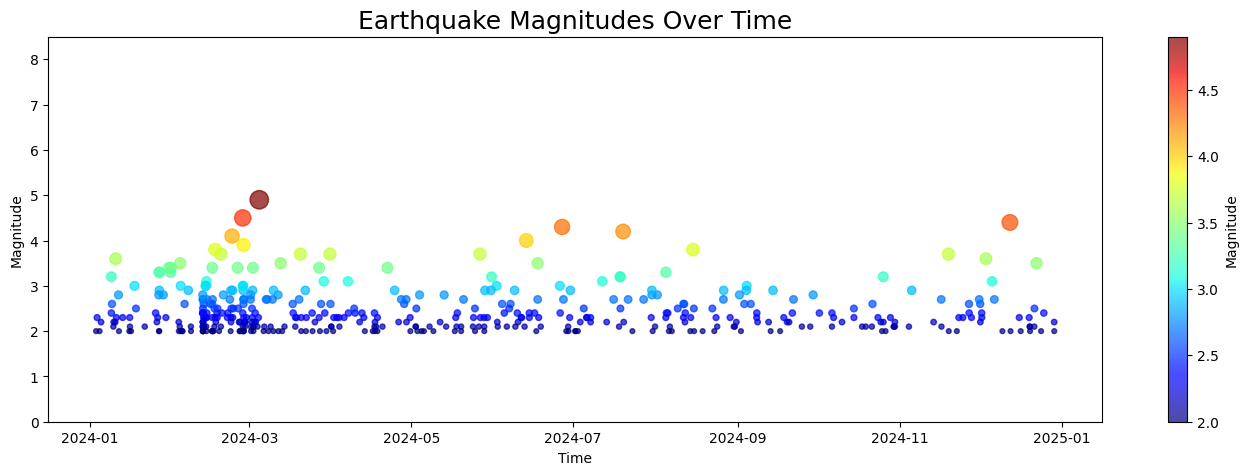

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming Marmara1990X is your dataset
# Creating a DataFrame with example data
data = pd.DataFrame({
    'Date': Marmara2024_PrX.iloc[:, 0].values,
    'Magnitude': Marmara2024_PrX.iloc[:, 4].values
})

# Correcting the Date format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %H:%M:%S', errors='coerce')

# Checking for and handling invalid dates
if data['Date'].isna().any():
    print("Warning: Some dates could not be parsed. Check the dataset for inconsistencies.")

# Dropping rows with invalid dates, if any
data = data.dropna(subset=['Date'])

# Plotting
plt.figure(figsize=(17, 5))
scatter = plt.scatter(
    data['Date'], data['Magnitude'],
    c=data['Magnitude'], cmap='jet',
    s=data['Magnitude']**3 * 1.5,  # Scaling the size based on magnitude
    alpha=0.7)

plt.colorbar(scatter, label='Magnitude')  # Adding a color bar
plt.xlabel('Time')  # Correctly labeling the x-axis
plt.ylabel('Magnitude')
plt.rc('font', size=15)
plt.ylim(0, 8.5)
plt.title('Earthquake Magnitudes Over Time')

plt.show()


0
                   Time  Magnitude  time_numeric   b-value
0   2024-12-29 04:24:10        2.0  1.735446e+09  1.670363
1   2024-12-29 03:48:10        2.2  1.735444e+09  1.710349
2   2024-12-25 06:06:10        2.4  1.735107e+09  1.750644
3   2024-12-24 05:25:10        2.0  1.735018e+09  1.763801
4   2024-12-22 12:08:10        3.5  1.734869e+09  1.750142
..                  ...        ...           ...       ...
430 2024-01-09 01:31:38        2.4  1.704764e+09  1.443275
431 2024-01-05 04:20:10        2.2  1.704428e+09  1.404306
432 2024-01-04 15:22:04        2.0  1.704382e+09  1.374186
433 2024-01-03 16:38:07        2.3  1.704300e+09  1.344245
434 2024-01-03 07:22:17        2.0  1.704267e+09  1.338309

[435 rows x 4 columns]


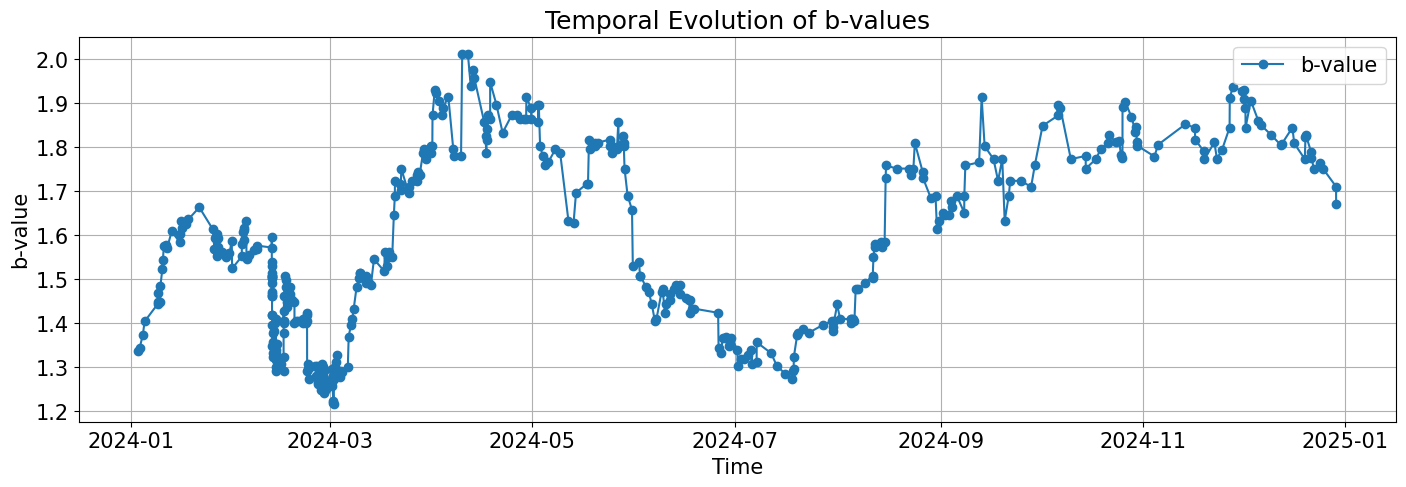

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute b-value
def compute_b_value(magnitudes, mc, bin_width=0.1):
    """
    Compute the b-value using the Maximum Likelihood Estimation (MLE) method.
    """
    if len(magnitudes) > 0:
        mean_mag = np.mean(magnitudes)
        b_value = (1 / np.log(10)) / (mean_mag - mc + (bin_width / 2))
    else:
        b_value = np.nan
    return b_value

# Function to calculate b-value for each earthquake
def b_value_for_each_earthquake(times, magnitudes, window_size=100):
    """
    Calculate b-value for each earthquake using a sliding window.

    Parameters:
        times (list or array): Timestamps of earthquakes.
        magnitudes (list or array): Magnitudes of earthquakes.
        window_size (int): Number of earthquakes in each window.

    Returns:
        b_values (list): b-values calculated for each earthquake.
    """
    b_values = []

    for i in range(len(magnitudes)):
        # Define the window around the current earthquake
        start = max(0, i - window_size // 2)
        end = min(len(magnitudes), i + window_size // 2)

        window_magnitudes = magnitudes[start:end]

        # Calculate Mc, ensuring it is at least 2
        mc = max(2, np.min(window_magnitudes)) + 0.2

        # Compute b-value
        b_value = compute_b_value(window_magnitudes, mc)
        b_values.append(b_value)

    return b_values

# Assuming your DataFrame is already defined as Marmara1998
data = pd.DataFrame({
    'Time': Marmara2024_PrX.iloc[:, 0].values,
    'Magnitude':Marmara2024_PrX.iloc[:, 4].values
})

# Convert time to numeric (timestamp) with dayfirst=True and correct format
data["Time"] = pd.to_datetime(data["Time"], format="%m/%d/%Y %H:%M:%S", errors='coerce')
data["time_numeric"] = data["Time"].apply(lambda x: x.timestamp())

# Check for any invalid or missing dates
print(data["Time"].isna().sum())  # This will print how many invalid dates were found

# Calculate b-values for each earthquake
b_values = b_value_for_each_earthquake(
    data["time_numeric"].values,
    data["Magnitude"].values
)

# Add b-values to the DataFrame
data['b-value'] = b_values

# Display the DataFrame
print(data)

# Plot the results
plt.figure(figsize=(17, 5))
plt.plot(data['Time'], data['b-value'], marker='o', linestyle='-', label='b-value')
plt.xlabel("Time")
plt.ylabel("b-value")
plt.grid()
plt.legend()
plt.title("Temporal Evolution of b-values")
plt.show()


In [11]:
print(b_values)

[1.670363391935584, 1.710348924869951, 1.7506444231759004, 1.7638013441281526, 1.7501419419981785, 1.7759253906824437, 1.788271396072215, 1.8269214367885875, 1.825295648578887, 1.8237277176008435, 1.7726305383806173, 1.8083251464913566, 1.844264238219288, 1.8059770534590687, 1.8048601845329957, 1.8271288882661103, 1.8492539229428842, 1.8592798905762247, 1.9052919206078158, 1.844081184696887, 1.8882368778402274, 1.9092822424229665, 1.9301976973477872, 1.9272642661968036, 1.936011545833774, 1.9103862840318993, 1.843931878471908, 1.7930656893592714, 1.7735586171965274, 1.8105152543723944, 1.7726305383806207, 1.7902215284561553, 1.8169463018401388, 1.8438077748322255, 1.851814034511329, 1.8051359883509253, 1.7785393068418902, 1.8035140775934593, 1.8112755643358356, 1.8449741713312358, 1.8350471066334593, 1.8685956431771134, 1.902623444528531, 1.8917745581734144, 1.7749426651698097, 1.7822019775727371, 1.8127074027266203, 1.811895257832923, 1.8266463187347102, 1.8103222614072432, 1.79460529

In [12]:
b_values

[1.670363391935584,
 1.710348924869951,
 1.7506444231759004,
 1.7638013441281526,
 1.7501419419981785,
 1.7759253906824437,
 1.788271396072215,
 1.8269214367885875,
 1.825295648578887,
 1.8237277176008435,
 1.7726305383806173,
 1.8083251464913566,
 1.844264238219288,
 1.8059770534590687,
 1.8048601845329957,
 1.8271288882661103,
 1.8492539229428842,
 1.8592798905762247,
 1.9052919206078158,
 1.844081184696887,
 1.8882368778402274,
 1.9092822424229665,
 1.9301976973477872,
 1.9272642661968036,
 1.936011545833774,
 1.9103862840318993,
 1.843931878471908,
 1.7930656893592714,
 1.7735586171965274,
 1.8105152543723944,
 1.7726305383806207,
 1.7902215284561553,
 1.8169463018401388,
 1.8438077748322255,
 1.851814034511329,
 1.8051359883509253,
 1.7785393068418902,
 1.8035140775934593,
 1.8112755643358356,
 1.8449741713312358,
 1.8350471066334593,
 1.8685956431771134,
 1.902623444528531,
 1.8917745581734144,
 1.7749426651698097,
 1.7822019775727371,
 1.8127074027266203,
 1.811895257832923,
 1.

In [13]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values

colors = b_values
sizes =b_values

In [14]:
import plotly.graph_objects as go
import numpy as np

# Veriler
x = Marmara2024_PrX.iloc[:, 1].values  # Boylam değerleri
y = Marmara2024_PrX.iloc[:, 2].values  # Enlem değerleri
z = Marmara2024_PrX.iloc[:, 3].values  # Büyüklük değerleri (Magnitude)
b_values = np.clip(b_values, 0, 2.5)  # b_values değerlerini 0-2.5 aralığına sınırlıyoruz

# Dünya haritası
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=[],  # Ülkeler belirtilmediği için genel dünya haritası
    z=[],  # Z değeri atanmıyor
    colorscale='Jet',  # Renk skalası
    marker_opacity=0.3,  # Sınırların opaklık seviyesi
    marker_line_width=0.5,  # Sınır çizgilerinin kalınlığı
))

# Scatter plot ile deprem noktalarını görselleştirme
fig.add_trace(go.Scattermapbox(
    lat=y,  # Enlem bilgisi
    lon=x,  # Boylam bilgisi
    mode='markers',
    marker=dict(
        size=[size *6 for size in b_values],  # 0-2.5 aralığında nokta boyutu
        color=b_values,  # Renkler de aynı şekilde 0-2.5 aralığında
        colorscale='Jet',  # Renk skalası
        cmin=0,  # Renk skalasının minimum değeri
        cmax=2.5,  # Renk skalasının maksimum değeri
        showscale=True,  # Renk skalasını göster
        colorbar=dict(
            title="b-values",
            titleside="right"
        ),
    ),
    text=[f"Magnitude: {mag}" for mag in z],  # Tooltip metni
))

# Harita düzeni ve görünüm ayarları
fig.update_layout(
    mapbox_style="open-street-map",  # Harita stili
    mapbox_zoom=5,  # Marmara Bölgesi için uygun bir zoom seviyesi
    mapbox_center={"lat": y.mean(), "lon": x.mean()},  # Harita merkezini Marmara Bölgesi'ne ayarla

    width=1300,  # Harita genişliği
    height=680,  # Harita yüksekliği
)

# Haritayı gösterme
fig.show()


In [15]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = Marmara2024_PrX.iloc[:,0].values
colors = b_values
sizes = b_values

In [16]:
z

array(['12/29/2024 04:24:10', '12/29/2024 03:48:10',
       '12/25/2024 06:06:10', '12/24/2024 05:25:10',
       '12/22/2024 12:08:10', '12/21/2024 17:31:10',
       '12/21/2024 16:04:10', '12/20/2024 01:39:10',
       '12/20/2024 00:07:10', '12/19/2024 22:29:10',
       '12/19/2024 17:57:10', '12/16/2024 13:21:10',
       '12/16/2024 00:10:10', '12/12/2024 17:24:10',
       '12/12/2024 11:34:10', '12/9/2024 15:46:10', '12/6/2024 14:50:10',
       '12/5/2024 18:15:10', '12/3/2024 11:12:10', '12/1/2024 21:29:10',
       '12/1/2024 20:28:10', '12/1/2024 08:40:10', '12/1/2024 07:03:10',
       '11/30/2024 21:53:10', '11/28/2024 00:11:10',
       '11/27/2024 03:14:10', '11/27/2024 01:50:10',
       '11/24/2024 18:25:10', '11/23/2024 06:16:10',
       '11/22/2024 11:51:10', '11/19/2024 11:08:10',
       '11/19/2024 07:46:10', '11/16/2024 16:58:10',
       '11/16/2024 14:45:10', '11/13/2024 18:17:10', '11/5/2024 11:59:10',
       '11/4/2024 10:41:10', '10/30/2024 04:27:10', '10/30/2024 04:03

In [17]:
from datetime import datetime

# Zaman damgalarını içeren bir liste oluştur
timestamps = z  # Replace 'z' with your actual list of timestamps

# Zaman damgalarını saniyeye dönüştür
seconds = [datetime.timestamp(datetime.strptime(timestamp, '%m/%d/%Y %H:%M:%S')) for timestamp in timestamps]

print(seconds)  # Saniye cinsinden zaman damgalarını görüntüle


[1735446250.0, 1735444090.0, 1735106770.0, 1735017910.0, 1734869290.0, 1734802270.0, 1734797050.0, 1734658750.0, 1734653230.0, 1734647350.0, 1734631030.0, 1734355270.0, 1734307810.0, 1734024250.0, 1734003250.0, 1733759170.0, 1733496610.0, 1733422510.0, 1733224330.0, 1733088550.0, 1733084890.0, 1733042410.0, 1733036590.0, 1733003590.0, 1732752670.0, 1732677250.0, 1732672210.0, 1732472710.0, 1732342570.0, 1732276270.0, 1732014490.0, 1732002370.0, 1731776290.0, 1731768310.0, 1731521830.0, 1730807950.0, 1730716870.0, 1730262430.0, 1730260990.0, 1730230150.0, 1730222650.0, 1730115910.0, 1729957690.0, 1729885030.0, 1729884070.0, 1729842370.0, 1729803010.0, 1729709590.0, 1729533130.0, 1729512070.0, 1729312750.0, 1729192450.0, 1728927670.0, 1728926830.0, 1728540010.0, 1728266770.0, 1728213430.0, 1728212650.0, 1727803390.0, 1727600716.0, 1727506052.0, 1727234434.0, 1726961814.0, 1726924511.0, 1726817560.0, 1726754335.0, 1726645614.0, 1726527145.0, 1726295758.0, 1726217345.0, 1726152344.0, 17257

In [18]:
seconds

[1735446250.0,
 1735444090.0,
 1735106770.0,
 1735017910.0,
 1734869290.0,
 1734802270.0,
 1734797050.0,
 1734658750.0,
 1734653230.0,
 1734647350.0,
 1734631030.0,
 1734355270.0,
 1734307810.0,
 1734024250.0,
 1734003250.0,
 1733759170.0,
 1733496610.0,
 1733422510.0,
 1733224330.0,
 1733088550.0,
 1733084890.0,
 1733042410.0,
 1733036590.0,
 1733003590.0,
 1732752670.0,
 1732677250.0,
 1732672210.0,
 1732472710.0,
 1732342570.0,
 1732276270.0,
 1732014490.0,
 1732002370.0,
 1731776290.0,
 1731768310.0,
 1731521830.0,
 1730807950.0,
 1730716870.0,
 1730262430.0,
 1730260990.0,
 1730230150.0,
 1730222650.0,
 1730115910.0,
 1729957690.0,
 1729885030.0,
 1729884070.0,
 1729842370.0,
 1729803010.0,
 1729709590.0,
 1729533130.0,
 1729512070.0,
 1729312750.0,
 1729192450.0,
 1728927670.0,
 1728926830.0,
 1728540010.0,
 1728266770.0,
 1728213430.0,
 1728212650.0,
 1727803390.0,
 1727600716.0,
 1727506052.0,
 1727234434.0,
 1726961814.0,
 1726924511.0,
 1726817560.0,
 1726754335.0,
 172664561

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
from datetime import datetime

# Zaman verilerini saniyeden yıla dönüştüren fonksiyon
def seconds_to_year(seconds):
    timestamp = datetime.fromtimestamp(seconds)
    return timestamp.year

x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = seconds
colors = b_values
sizes = b_values*6


# İnteraktif işlev
def plot_3d_scatter(elev, azim, zoom):
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(scatter)
    cbar.set_label('b_values')

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Time (year)')  # "Time" için değişiklik burada
    ax.dist = zoom  # Zoom ayarı

    # Zaman etiketlerini güncelleme
    time_ticks = np.linspace(min(z), max(z), 5)
    time_labels = [seconds_to_year(t) for t in time_ticks]
    ax.set_zticks(time_ticks)
    ax.set_zticklabels(time_labels)

    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider)

# Adjust font size
plt.rc('font', size=15)

# Widget'ı görüntüleme
display(interactive_plot)


interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…

In [20]:
import pandas as pd

# daily_b_values verisini bir DataFrame'e dönüştürün (eğer zaten bir DataFrame değilse)
df = pd.DataFrame(b_values)

# Excel dosyasına yazdırma
df.to_excel("b_values.xlsx", index=False)  # index=False, satır numarasını yazdırmaz

In [27]:
df = pd.read_csv("Marmara2024_PrX.csv",sep=",")

In [28]:
Marmara2024_PrX = df
Marmara2024_PrX.head()

,Time,Longitude,Latitude,Depth,Magnitude
0,12/29/2024 04:24:10,26.96,40.31,10.81,2.0
1,12/29/2024 03:48:10,27.02,40.29,9.05,2.2
2,12/25/2024 06:06:10,27.79,40.80,6.94,2.4
3,12/24/2024 05:25:10,25.56,41.04,12.31,2.0
4,12/22/2024 12:08:10,27.95,40.82,7.00,3.5


In [30]:
import pandas as pd
import numpy as np

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)  # Enerji erg cinsinden
    energy_joule = energy_erg / 10**7  # Joule cinsine çevirme
    return energy_joule

# Örnek DataFrame (Gerçek verinizi buraya yükleyin)
# df = pd.read_csv("earthquake_data.csv")  # Eğer CSV'den yüklüyorsanız

# Sütun isimlerini temizleyelim (fazladan boşluk veya farklı büyük/küçük harf ihtimaline karşı)
df.columns = df.columns.str.strip().str.lower()  # Sütunları küçük harfe çevir

# "Magnitude" sütununun olup olmadığını kontrol et
if "magnitude" in df.columns:
    magnitudes = df[['magnitude']].values  # 2D NumPy array
    print("Deprem büyüklüğü ve enerji (Joule):")
    for mw in magnitudes:
        magnitude = mw[0]  # 2D array olduğu için ilk elemanı al
        energy = calculate_earthquake_energy(magnitude)
        print(f"Mw: {magnitude} --> Enerji: {energy:.2e} Joule")
else:
    print("Hata: 'Magnitude' sütunu bulunamadı. Lütfen DataFrame'in sütunlarını kontrol edin.")
    print("Mevcut sütunlar:", df.columns)


Deprem büyüklüğü ve enerji (Joule):
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 3.5 --> Enerji: 1.12e+03 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 4.4 --> Enerji: 2.51e+04 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.7 --> Enerji: 7.08e+01 Joule
Mw: 3.1 --> Enerji: 2.82e+02 Joule
Mw: 3.6 --> Enerji: 1.58e+03 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.7 --> Enerji: 7.08e+01 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.3 --> Enerji:

In [34]:
# Sütun isimlerini temizle (fazladan boşlukları kaldır ve küçük harfe çevir)
df.columns = df.columns.str.strip().str.lower()

# Doğru sütun adını belirle
column_name = "magnitude"

# Eğer sütun varsa işlemi yap, yoksa hata mesajı ver
if column_name in df.columns:
    magnitudes = df[[column_name]].values  # 2D NumPy array olarak al
    print("Deprem büyüklüğü ve enerji (Joule):")
    for mw in magnitudes:
        magnitude = mw[0]  # 2D array olduğu için ilk elemanı al
        energy = calculate_earthquake_energy(magnitude)
        print(f"Mw: {magnitude} --> Enerji: {energy:.2e} Joule")
else:
    print(f"Hata: '{column_name}' sütunu bulunamadı! Mevcut sütunlar: {list(df.columns)}")


Deprem büyüklüğü ve enerji (Joule):
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 3.5 --> Enerji: 1.12e+03 Joule
Mw: 2.5 --> Enerji: 3.55e+01 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.1 --> Enerji: 8.91e+00 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 4.4 --> Enerji: 2.51e+04 Joule
Mw: 2.0 --> Enerji: 6.31e+00 Joule
Mw: 2.7 --> Enerji: 7.08e+01 Joule
Mw: 3.1 --> Enerji: 2.82e+02 Joule
Mw: 3.6 --> Enerji: 1.58e+03 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.2 --> Enerji: 1.26e+01 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.7 --> Enerji: 7.08e+01 Joule
Mw: 2.3 --> Enerji: 1.78e+01 Joule
Mw: 2.4 --> Enerji: 2.51e+01 Joule
Mw: 2.6 --> Enerji: 5.01e+01 Joule
Mw: 2.3 --> Enerji:

In [38]:
import pandas as pd

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    energy_joule = energy_erg / 10**7
    return energy_joule

# Sütun adlarını temizle (fazladan boşlukları kaldır ve küçük harfe çevir)
df.columns = df.columns.str.strip().str.lower()

# Doğru sütun adını belirle
column_name = "magnitude"

# Eğer sütun varsa işlemi yap, yoksa hata mesajı ver
if column_name in df.columns:
    # NumPy array olarak al
    magnitudes = df[[column_name]].values

    # Enerji değerlerini hesapla ve listeye ekle
    energies = [calculate_earthquake_energy(mw[0]) for mw in magnitudes]

    # Sonuç
    print(energies)
else:
    print(f"Hata: '{column_name}' sütunu bulunamadı! Mevcut sütunlar: {list(df.columns)}")


[6.30957344480193, 12.58925411794166, 25.11886431509572, 6.30957344480193, 1122.0184543019652, 35.481338923357605, 8.91250938133746, 6.30957344480193, 8.91250938133746, 8.91250938133746, 17.78279410038923, 6.30957344480193, 17.78279410038923, 6.30957344480193, 25118.864315095823, 6.30957344480193, 70.79457843841402, 281.8382931264449, 1584.8931924611109, 17.78279410038923, 25.11886431509572, 12.58925411794166, 50.118723362727145, 70.79457843841402, 17.78279410038923, 25.11886431509572, 50.118723362727145, 17.78279410038923, 17.78279410038923, 6.30957344480193, 6.30957344480193, 2238.7211385683468, 8.91250938133746, 70.79457843841402, 12.58925411794166, 141.25375446227497, 8.91250938133746, 8.91250938133746, 12.58925411794166, 8.91250938133746, 8.91250938133746, 17.78279410038923, 6.30957344480193, 12.58925411794166, 398.1071705534986, 6.30957344480193, 12.58925411794166, 17.78279410038923, 50.118723362727145, 8.91250938133746, 8.91250938133746, 8.91250938133746, 17.78279410038923, 35.4

In [39]:
energies

[6.30957344480193,
 12.58925411794166,
 25.11886431509572,
 6.30957344480193,
 1122.0184543019652,
 35.481338923357605,
 8.91250938133746,
 6.30957344480193,
 8.91250938133746,
 8.91250938133746,
 17.78279410038923,
 6.30957344480193,
 17.78279410038923,
 6.30957344480193,
 25118.864315095823,
 6.30957344480193,
 70.79457843841402,
 281.8382931264449,
 1584.8931924611109,
 17.78279410038923,
 25.11886431509572,
 12.58925411794166,
 50.118723362727145,
 70.79457843841402,
 17.78279410038923,
 25.11886431509572,
 50.118723362727145,
 17.78279410038923,
 17.78279410038923,
 6.30957344480193,
 6.30957344480193,
 2238.7211385683468,
 8.91250938133746,
 70.79457843841402,
 12.58925411794166,
 141.25375446227497,
 8.91250938133746,
 8.91250938133746,
 12.58925411794166,
 8.91250938133746,
 8.91250938133746,
 17.78279410038923,
 6.30957344480193,
 12.58925411794166,
 398.1071705534986,
 6.30957344480193,
 12.58925411794166,
 17.78279410038923,
 50.118723362727145,
 8.91250938133746,
 8.9125093

In [41]:
import pandas as pd

def calculate_earthquake_energy(magnitude):
    """
    Deprem büyüklüğüne (Mw) göre enerjiyi hesaplar.
    Enerji, erg biriminden Joule'a çevrilir.
    """
    energy_erg = 10 ** (1.5 * magnitude + 4.8)
    energy_joule = energy_erg / 10**7
    return energy_joule

# Sütun adlarını temizle (fazladan boşlukları kaldır ve küçük harfe çevir)
df.columns = df.columns.str.strip().str.lower()

# Doğru sütun adını belirle
column_name = "magnitude"

# Eğer sütun varsa işlemi yap, yoksa hata mesajı ver
if column_name in df.columns:
    # NumPy array olarak al
    magnitudes = df[[column_name]].values

    # Enerji değerlerini hesapla ve listeye ekle
    energies = [calculate_earthquake_energy(mw[0]) for mw in magnitudes]

    # Yeni DataFrame oluştur
    energies_df = pd.DataFrame(energies, columns=['Energy (Joules)'])

    # Excel dosyasına kaydet
    energies_df.to_excel('earthquake_energies.xlsx', index=False)

    print("Enerji verileri başarıyla kaydedildi.")


Enerji verileri başarıyla kaydedildi.


In [42]:
df['Energy (Joule)'] = energies

In [43]:
Marmara2024_PrX= df
Marmara2024_PrX.head()

,time,longitude,latitude,depth,magnitude,Energy (Joule)
0,12/29/2024 04:24:10,26.96,40.31,10.81,2.0,6.309573
1,12/29/2024 03:48:10,27.02,40.29,9.05,2.2,12.589254
2,12/25/2024 06:06:10,27.79,40.80,6.94,2.4,25.118864
3,12/24/2024 05:25:10,25.56,41.04,12.31,2.0,6.309573
4,12/22/2024 12:08:10,27.95,40.82,7.00,3.5,1122.018454


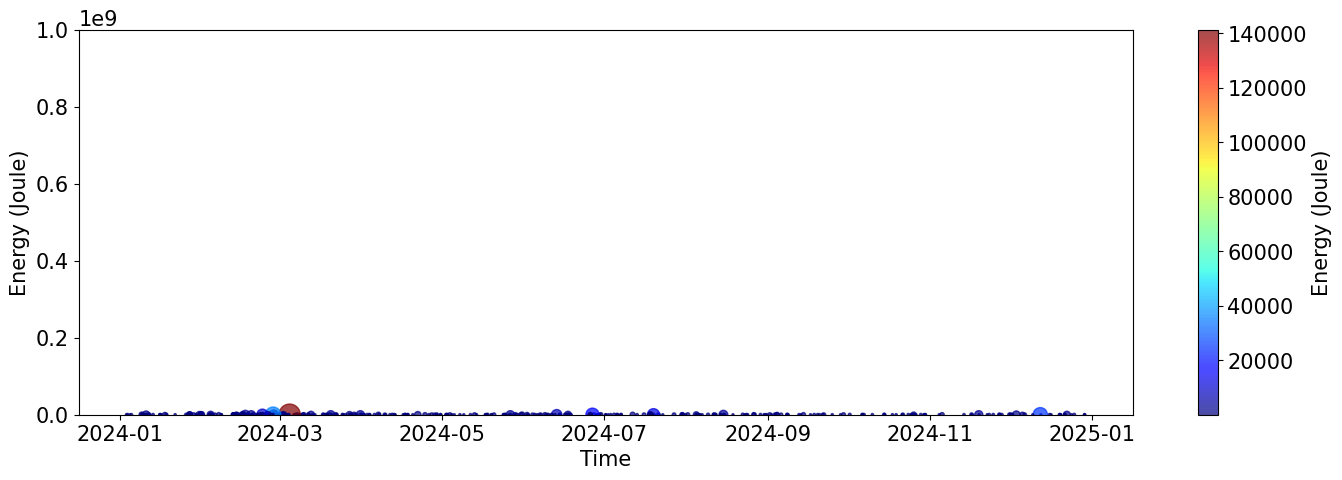

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.DataFrame({
    'Time': Marmara2024_PrX.iloc[:, 0].values,
    'Energy (Joule)': Marmara2024_PrX.iloc[:, 5].values
})

# Converting the Time column to datetime format with the correct format and dayfirst=True
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %H:%M:%S', dayfirst=False)

# Plotting
plt.rc('font', size=15)  # Setting the font size globally
plt.figure(figsize=(17, 5))

scatter = plt.scatter(
    data['Time'], data['Energy (Joule)'],
    c=data['Energy (Joule)'], cmap='jet',
    s=data['Energy (Joule)']** 0.46,  # Adjust the size scaling as needed
    alpha=0.7
)

plt.colorbar(scatter, label='Energy (Joule)')  # Adding color bar
plt.xlabel('Time')
plt.ylabel('Energy (Joule)')
plt.ylim(0, 10e8)
plt.show()


In [45]:
x = Marmara2024_PrX.iloc[:,1].values
y = Marmara2024_PrX.iloc[:,2].values
z = Marmara2024_PrX.iloc[:,3].values
colors = Marmara2024_PrX.iloc[:,4].values
sizes = Marmara2024_PrX.iloc[:,4].values*40

In [48]:
import plotly.graph_objects as go

# Obtain high-resolution world map data online
fig = go.Figure(go.Choroplethmapbox(
    geojson="https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json",
    locations=["USA", "CAN", "MEX", "RUS", "CHN"],  # Example country codes (USA, Canada, Mexico, Russia, China)
    z=[1, 1, 1, 1, 1],  # Values to be assigned to countries (all set to 1)
    colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    zmin=2,
    zmax=6,
    marker_opacity=0.9,  # Opacity of country borders
    marker_line_width=1,  # Thickness of country borders
))

# Create sample earthquake data
earthquake_data = {
    'Longitude': x,
    'Latitude': y,
    'Magnitude': colors,
}

# Add earthquake data with Scatter plot
fig.add_trace(go.Scattermapbox(
    lat=earthquake_data['Latitude'],
    lon=earthquake_data['Longitude'],
    mode='markers',
    marker=dict(
        size=earthquake_data['Magnitude'] * 2.8,  # Set point sizes based on Magnitude value
        color=earthquake_data['Magnitude'],  # Set color scale based on Magnitude value
        colorscale='Jet',  # Color scale name (Viridis, YlGnBu, Jet, etc.)
    ),
))

# Specify map layout and style
fig.update_layout(
    mapbox_style="open-street-map",  # Set map style (for other styles: "open-street-map", "stamen-terrain", etc.)
    mapbox_zoom=6,  # Set map zoom level
    mapbox_center={"lat": 40.500, "lon": 29.0000},  # Set map center (center of the USA)
)

# Increase resolution and font size
fig.update_layout(
    width=1000,  # Set width to increase resolution
    height=600,  # Set height to increase resolution
    font=dict(
        size=25  # Set font size for English comments
    )
)

# Display the plot
fig.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display



# İnteraktif işlev

def plot_3d_scatter(elev, azim, zoom, theta):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet')
    cbar = plt.colorbar(ax.scatter(x, y, z, c=colors, s=sizes, cmap='jet'))
    cbar.set_label('Magnitude')

    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth_km')
    ax.dist = zoom  # Zoom ayarı
    ax.azim = theta  # Maus ile çevirme
    plt.show()

# İnteraktif widget'ı oluşturma
elev_slider = widgets.IntSlider(min=0, max=180, value=30, description='Elevation:')
azim_slider = widgets.IntSlider(min=0, max=360, value=30, description='Azimuth:')
zoom_slider = widgets.FloatSlider(min=1, max=10, value=5, description='Zoom:')
theta_slider = widgets.IntSlider(min=0, max=360, value=30, description='Theta:')
interactive_plot = interactive(plot_3d_scatter, elev=elev_slider, azim=azim_slider, zoom=zoom_slider, theta=theta_slider)

# Widget'ı görüntüleme
display(interactive_plot)

interactive(children=(IntSlider(value=30, description='Elevation:', max=180), IntSlider(value=30, description=…